# Extension: Image Processing - NMF
Using the LCD digits dataset, train a non-negative matrix factorisation (NMF) model to correctly identify the components digital numbers.
## Set up
Import the dataset and required modules

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import NMF

Load the LCD digits dataset as a pandas dataframe and assign to a variable <code>df</code>. The data contains information on 99 different LCD digits presented as a grey-scale image. Each column represents a pixel in a two by two array and each value measures the amount of white in a pixel.

In [9]:
df = pd.read_csv('lcd-digits.csv')
df.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.82,0.0.83,0.0.84,0.0.85,0.0.86,0.0.87,0.0.88,0.0.89,0.0.90,0.0.91
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Examine the data
Use Pyplot to examine a selection of the different entries. First, each row needs to be transformed from a flattened array to a two dimensional array of 13 by 8.

In [26]:
df.shape

(99, 104)

Extract values from dataframe:

In [35]:
X = df.values

Resize array to (99, 13, 8)

In [64]:
X = X.reshape(99, 13, 8)

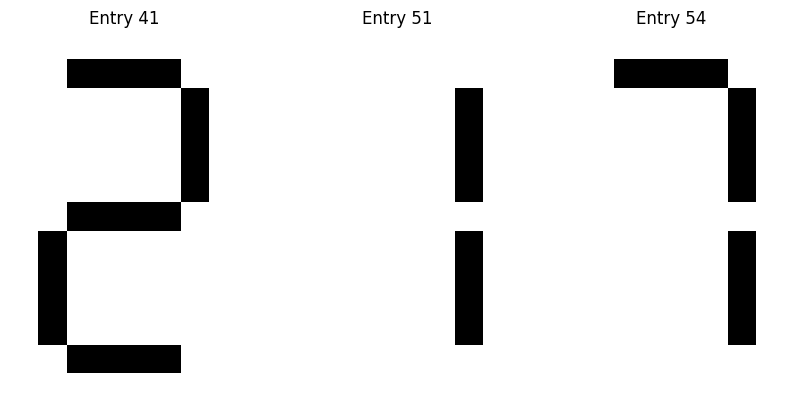

In [88]:
selection_list = [41, 51, 54]
plt.figure(figsize=(10, 10))
for count, value in enumerate(selection_list):
    plt.subplot(1, 3, count + 1)
    plt.imshow(X[value, :,:], cmap='gray_r')
    plt.title(f'Entry {value}')
    plt.axis('off')

## NMF model
Because all entries are non-negative, NMF can reduce the dimensions (columns) of the dataset from 104 to n.<br>
Create a NMF model with SK-learn. Set number of components to be n=7 (the total number of components to make all numbers on an LCD display.)

In [133]:
nmf = NMF(n_components=7)

Fit the model to the dataset and transform:

In [134]:
fitted_model = nmf.fit_transform(df.values)

Draw each NMF component:

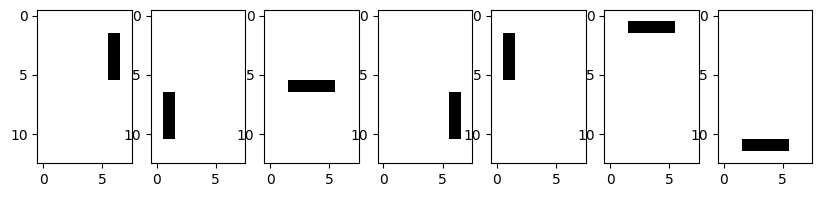

In [135]:
plt.figure(figsize=(10, 10))
for count, value in enumerate(nmf.components_):
    bitmap = value.reshape(13, 8)
    plt.subplot(1, 7, count + 1)
    plt.imshow(bitmap, cmap='gray_r')


Every digit can be displayed as some combination of the above components. The model has learnt the pattern of pixels for each component.